In [30]:
import pandas as pd
import numpy as np
import missingno as msn

import matplotlib.pyplot as plt
import seaborn as sns

# Carga de datos

## Train

### Archivo products.csv

In [3]:
products = pd.read_csv("../data/products.csv")

print(f"Dimension: {products.shape}")
print(f"Cabecera {list(products.columns)}")

Dimension: (15238, 4)
Cabecera ['product_id', 'family_id', 'subfamily_id', 'price']


### Archivo stock_and_sales_day_0_day_63.csv

In [4]:
products_stock_ventas = pd.read_csv("../data/stock_and_sales_day_0_day_63.csv")

print(f"Dimension: {products_stock_ventas.shape}")
print(f"Cabecera {list(products_stock_ventas.columns)}")

Dimension: (2421061, 6)
Cabecera ['date_number', 'product_id', 'color_id', 'size_id', 'sales', 'stock']


In [5]:
# products_stock_ventas.head()

### Archivo product_blocks.csv

In [6]:
products_blocks = pd.read_csv("../data/product_blocks.csv")

print(f"Dimension: {products_blocks.shape}")
print(f"Cabecera {list(products_blocks.columns)}")

Dimension: (15238, 2)
Cabecera ['product_id', 'block_id']


In [7]:
# products_blocks.head()

### Archivo positions_day_0_day_63.csv

In [8]:
product_positions_0_63 = pd.read_csv("../data/positions_day_0_day_63.csv")

print(f"Dimension: {product_positions_0_63.shape}")
print(f"Cabecera {list(product_positions_0_63.columns)}")

Dimension: (969897, 4)
Cabecera ['date_number', 'product_id', 'category_id', 'position']


In [9]:
# product_positions_0_63.head()

## Test

In [10]:
product_stock_70= pd.read_csv("../data/stock_day_71_stock_replenishment_days_72-77.csv")


In [11]:
product_positions_71 = pd.read_csv("../data/positions_day_71.csv")

# Dataframe Train

In [12]:
train = pd.merge(products,products_blocks,how='inner',on='product_id')

In [13]:
train.shape

(15238, 5)

Join con ventas

In [14]:
train = pd.merge(train,products_stock_ventas,how='inner',on='product_id')

In [15]:
train.shape

(2421061, 10)

In [16]:
train_g = train.groupby(['product_id','date_number']).agg({'price':'max',
                                                 'color_id':'count',
                                                 'color_id':pd.Series.nunique,
                                                 'size_id':'count',
                                                 'sales':'sum',
                                                 'stock':'sum',
                                                 'block_id':'max',
                                                 'family_id':np.unique,
                                                 'subfamily_id':np.unique})

In [26]:
train_g.shape

(418064, 8)

In [17]:
train_g.head()

price  color_id  size_id  sales  stock  block_id  \
product_id date_number                                                     
151926     59           25.95         1        4      5    155      1969   
           60           25.95         1        5     10    330      1969   
           61           25.95         1        5      9    308      1969   
           62           25.95         1        5      9    289      1969   
           63           25.95         1        5      8    261      1969   

                        family_id  subfamily_id  
product_id date_number                           
151926     59           396066037     335531561  
           60           396066037     335531561  
           61           396066037     335531561  
           62           396066037     335531561  
           63           396066037     335531561

## Grafico de cuantos dias estan los productos en la tienda

_TODO: Poner esto en el EDA_

In [23]:
dias_en_tiendas = train_g.groupby('product_id').count()

Como podemos ver aquí, la mitad de productos si llevan en la tienda desde el día 0, pero la otra mitad no.

In [41]:
dias_en_tiendas[['price']].reset_index().groupby('price').count()

,product_id
price,
1,45
2,33
3,63
4,66
5,130
6,24
7,71
8,170
9,10


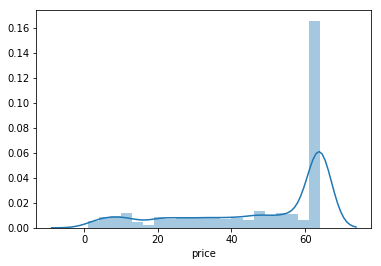

In [31]:
sns.distplot(dias_en_tiendas.price)

## Columna Beneficio

In [28]:
train['beneficio'] = train.price * train.sales

In [37]:
train.groupby('block_id').agg({'price':'count','beneficio':'sum'}).sort_values(['beneficio','price'],ascending=False)

,price,beneficio
block_id,,
2128,1949,499675.35
2037,2660,243420.45
1446,2745,188207.65
1143,2871,172570.81
1521,2636,161824.50
2574,3010,160036.25
9,681,158525.55
487,6495,148477.82
1477,1644,148424.50


# Export train

In [27]:
train.to_csv("train.csv",header=True,index=True,index_label='index')

In [28]:
!head train.csv

index,product_id,family_id,subfamily_id,price,block_id,date_number,color_id,size_id,sales,stock
0,151926,396066037,335531561,25.95,1969,59,909958217,111455099,0,17
1,151926,396066037,335531561,25.95,1969,59,909958217,242364222,3,63
2,151926,396066037,335531561,25.95,1969,59,909958217,513017386,1,33
3,151926,396066037,335531561,25.95,1969,59,909958217,820445075,1,42
4,151926,396066037,335531561,25.95,1969,60,909958217,54666687,2,72
5,151926,396066037,335531561,25.95,1969,60,909958217,111455099,2,21
6,151926,396066037,335531561,25.95,1969,60,909958217,242364222,2,95
7,151926,396066037,335531561,25.95,1969,60,909958217,513017386,1,46
8,151926,396066037,335531561,25.95,1969,60,909958217,820445075,3,96
